## Figures for the "Classifying dog breeds" experiment

In this notebook we present the code that we used to generate the Figures 5 to 8 as included in [1].

[1] Andrade-Lotero, E., & Goldstone, R. L., & Ortiz-Duque, J. M., & Velazco-Garcia, J. A. (2021). *The Division of Linguistic Labor as a Form of Cognitive Offloading*. In preparation.

### Table of contents

1. [Project description](#description)
2. [Datasets](#datasets)
3. [Helper functions](#helper)
4. [Figures](#figures)

### Project description <a class="anchor" id="description"></a>

Principal Investigator / Contact person: Edgar J. Andrade-Lotero, Universidad del Rosario, Bogota, Colombia,  edgar.andrade@urosario.edu.co

In collaboration with: Robert L. Goldstone, Indiana University, Bloomington, Indiana, USA, rgoldsto@indiana.edu

In collaboration with: Javier Alejandro Velazco Garcia, Universidad del Rosario, Bogota, Colombia, javier.velasco8@gmail.com

In collaboration with: Julián Marcel Ortiz Duque, Independent Scholar, Bogota, Colombia, ortizd.julianUR@gmail.com

### Datasets <a class="anchor" id="datasets"></a>

Datasets described here:
- performances.csv
- rep-understanding.csv

=======================

Filename: performances.csv

Location: https://github.com/EAndrade-Lotero/SPUoDLL/blob/master/performances.csv

Behavioral data of 20 dyads playing the "Classifying dog breeds" experiment in the paired condition and 44 individuals playing the solo condition (see https://www.protocols.io/edit/classifying-dog-breeds-bvm6n49e). Data was obtained from raw json files output from nodeGame and processed into a single dataframe.

Date of data collection: From 09/16/2019 to 09/23/2019.

Method of data collection: nodeGame platform. Freely available at: https://github.com/Slendercoder/DLL (paired condition; Spanish interface) and at: https://github.com/Slendercoder/DLL_single (solo condition; Spanish interface).

Methods of data processing: Dataset generated from raw data via python scripts to create a single csv from multiple json output from nodeGame.

Number of variables: 17

Number of rows: 20735

Variables:
1. treatment: solo or paired.
2. stage: experiment's stage (training or game).
3. dyad: dyad's name (str or NaN if treatment is solo).
4. player: player's id.
5. expert_in: refers to the kind of dog  (terriers or hounds) on which the player trained during training rounds.
6. novice_in: refers to the kind of dog  (terriers or hounds) on which the player did not train during the training rounds.
7. round: round of the respective stage.
8. object: refers to the particular dog, referred to by the image's file name.
9. position: refers to the frame (1,2,...,5) on which this dog's image was shown. 
10. kind: dog's kind.
11. classif: refers to the label the player used to classify the dog.
12. accuracy: whether classification was correct (0=incorrect/1=correct).
13. expert_dog: whether dog is from a breed on which subject received training (true, false or NaN if stage is training round).
14. queried: number of times the player asked partner about dog (NaN if no query was made or if treatment is solo).
15. answered: proportion of times query was answered by partner.
16. answer_correct: proportion of times answer was correct.
17. Yes/No: proportion of 'Yes' answers by partner.

=======================

Filename: rep-understanding.csv

Location: https://github.com/EAndrade-Lotero/SPUoDLL/blob/master/rep-understanding.csv

Self-understanding reports from each participant for each dog breed, obtained at the end of the "Classifying dog breeds" experiment.

Date of data collection: From 09/16/2019 to 09/23/2019.

Method of data collection: nodeGame platform.

Methods of data processing: Dataset generated from raw data via a python script to create a single csv from multiple json output from nodeGame.

Number of variables: 9

Number of rows: 336

Variables:
1. treatment: single or dyad.
2. player: player's id.
3. kind: the dog's kind.
4. expertise: whether the player was trained on this kind of dog or not (experts or novices).
5. report: player's reported understanding score on this kind of dog.
6. accuracy: mean accuracy over game rounds on this kind of dog.
7. queried: proportion of times the player queried their partner on this kind of dog.
8. answered: proportion of times queries on this kind of dog were answered by partner.
9. player_responded: proportion of times player responded to queries on this kind of dog.
10. was_queried: proportion of times the player was queried on this kind of dog by partner.



### Helper functions <a class="anchor" id="helper"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [2]:
def filter_variables(df, dict_variables) :
    inicial = True
    for key in dict_variables.keys() :
        if type(dict_variables[key]) == str:
            if inicial :
                filtro = f"({key}\'{dict_variables[key]}\')"
                inicial = False
            else:
                filtro = filtro + f" and ({key}\'{dict_variables[key]}\')"
        else:
            if inicial :
                filtro = f"({key}{dict_variables[key]})"
                inicial = False
            else:
                filtro = filtro + f" and ({key}{dict_variables[key]})"

    return pd.DataFrame(df.query(filtro))

def mark_phase(x):
    if x['stage'] == 'Training rounds':
        return x['stage']
    elif x['expert_dog']:
        return 'Game rounds\nExpert-Dogs'
    else:
        return 'Game rounds\nNovice-Dogs'
    
dict_razas = {'A':'Cairn\n Terrier', 'C':'Norwich\n Terrier', 'B':'Irish\n Wolf\nHound', 'D':'Scottish\n Deer\nHound'}
dict_orden = {'A':1, 'C':2, 'B':3, 'D':4}

### Figures <a class="anchor" id="figures"></a>

**Figure 2:**

Dog classification accuracy. Each data point corresponds to the classification accuracy (1=correct, 0=incorrect) of the label that a participant attached to a dog, out of the five dogs presented each round. Top left: Training rounds. Top center and top right: classification of expert (center) and novice dogs (right) during game rounds. Bottom: Percentage of accuracy for paired and solo conditions over all training rounds and all game rounds differentiating between expert and novice dogs. The shaded regions and error bars correspond to a 95\% confidence interval of the percentage estimator.

In [3]:
data = pd.read_csv('performances.csv')
data['phase'] = data.apply(lambda x: mark_phase(x), axis=1)

data_training = filter_variables(data, {
    'stage==':'Training rounds'})[['treatment', 'round','accuracy']]
data_game_novices = filter_variables(data, {
    'stage==':'Game rounds',
    'expert_dog==':False
})[['treatment', 'round','accuracy']]
data_game_experts = filter_variables(data, {
    'stage==':'Game rounds',
    'expert_dog==':True
})[['treatment', 'round','accuracy']]

Text(0, 0.5, 'Accuracy (%)')

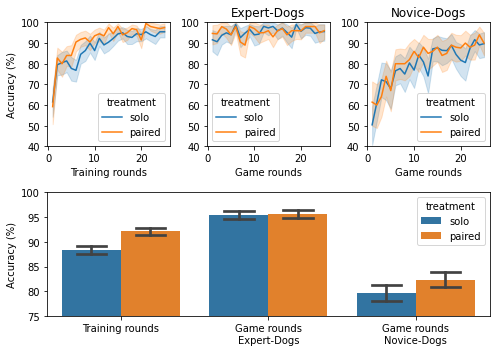

In [4]:
gs = GridSpec(2, 3)
fig = plt.figure(tight_layout=True, figsize=(7,5))
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

sns.lineplot(x='round', y='accuracy', hue='treatment', 
             data=data_training, 
             estimator=lambda x:sum(x)/len(x)*100,
             ci=95, ax=ax1)
sns.lineplot(x='round', y='accuracy', hue='treatment', 
             data=data_game_experts, 
             estimator=lambda x:sum(x)/len(x)*100,
             ci=95, ax=ax2)
sns.lineplot(x='round', y='accuracy', hue='treatment', 
             data=data_game_novices, 
             estimator=lambda x:sum(x)/len(x)*100,
             ci=95, ax=ax3)
sns.barplot(x='phase', y='accuracy', hue='treatment', 
            data=data,
             estimator=lambda x:sum(x)/len(x)*100,
             ci=95, capsize=.2, ax=ax4
            )

ax1.set_ylim(40, 100)
ax1.set_xlabel('Training rounds')
ax1.set_ylabel('Accuracy (%)')
ax2.set_title("Expert-Dogs")
ax2.set_xlabel("Game rounds")
ax2.set_ylabel('')
ax2.set_ylim(40, 100)
ax3.set_title("Novice-Dogs")
ax3.set_xlabel("Game rounds")
ax3.set_ylabel("")
ax3.set_ylim(40, 100)
#ax3.get_legend().remove()

ax4.set_ylim([75,100])
ax4.set_xlabel('')
ax4.set_ylabel('Accuracy (%)')

In [5]:
fig.savefig('figure2.pdf', dpi=300)

---

**Figure 3:**

Use of DLL strategy. Top left: Percentage of dogs on which players made a query, separated by each of the breeds and by each type of novice dog. Top right: Percentage of messages answered by experts and percentage of correctness of the answer. Bottom left: Percentage of novice dogs that players queried their partner about per round of play. The shaded region corresponds to a 95\% confidence interval. Bottom right: Percentage accuracy vs. whether the player queried their partner before classifying a novice dog.

In [6]:
df = filter_variables(data, {
    'treatment==':'paired',
    'stage==':'Game rounds'})
df['query'] = ['Yes' if x>0 else 'No' for x in df['queried']]
df = df.groupby(['novice_in', 'kind'])['query'].value_counts(dropna=False, normalize=True).reset_index(name='pregunta')
df = df[df['query']=='Yes']
del df['query']
df.columns = ['Novice in', 'kind', 'query']
df['query'] = df['query']*100
df['indice'] = df['kind'].map(dict_orden)
df['kind'] = df['kind'].map(dict_razas)
df.sort_values(by='indice', inplace=True)
del df['indice']
df_preguntas = df
df_preguntas

,Novice in,kind,query
1,hound,Cairn\n Terrier,1.121795
9,terrier,Cairn\n Terrier,40.000000
5,hound,Norwich\n Terrier,0.496689
12,terrier,Norwich\n Terrier,38.907285
3,hound,Irish\n Wolf\nHound,38.888889
7,hound,Scottish\n Deer\nHound,37.288136
14,terrier,Scottish\n Deer\nHound,0.333333


In [7]:
df = filter_variables(data, {
    'treatment==':'paired',
    'stage==':'Game rounds'})
df = df.groupby('kind')['answered'].mean().reset_index()
df['indice'] = df['kind'].map(dict_orden)
df['kind'] = df['kind'].map(dict_razas)
df.sort_values(by='indice', inplace=True)
del df['indice']
df.columns = ['kind', 'answered']
df_respondido = df

df = filter_variables(data, {
    'treatment==':'paired',
    'stage==':'Game rounds'})
df = df.groupby('kind')['answer_correct'].mean().reset_index()
df['indice'] = df['kind'].map(dict_orden)
df['kind'] = df['kind'].map(dict_razas)
df.sort_values(by='indice', inplace=True)
del df['indice']
df.columns = ['kind', 'correct']
df_correcto = df

df_respuestas = pd.merge(df_respondido, df_correcto, on='kind')
df_respuestas

,kind,answered,correct
0,Cairn\n Terrier,0.936293,0.915984
1,Norwich\n Terrier,0.964286,0.928261
2,Irish\n Wolf\nHound,0.972689,0.936782
3,Scottish\n Deer\nHound,0.907658,0.936275


In [8]:
df_msgs = filter_variables(data, {
    'treatment==':'paired',
    'stage==':'Game rounds',
    'expert_dog==':False
})[['player','round','queried','accuracy']]
df_msgs['queried'] = df_msgs['queried'].apply(lambda x: 1 if x> 0 else 0)
df_msgs['strategy'] = df_msgs['queried'].apply(lambda x: 'No' if x==0 else 'Yes')
df_msgs.head()

,player,round,queried,accuracy,strategy
11206,459819203408978,1,0,0,No
11209,459819203408978,1,0,0,No
11210,38174543864515,1,0,1,No
11212,38174543864515,1,0,0,No
11213,38174543864515,1,0,0,No


In [9]:
game_dyad = filter_variables(data, {
    'treatment==':'paired', 
    'stage==':'Game rounds',
    'expert_dog==':False
})
game_dyad['num_queries'] = game_dyad['queried'].apply(lambda x: x if x>0 else 0)
game_dyad['queried'] = game_dyad['queried'].apply(lambda x: 1 if x>0 else 0)
game_dyad['answer'] = game_dyad['answered'].apply(lambda x: 1 if x>0 else 0)
game_dyad['accuracy_external'] = game_dyad[['accuracy', 'queried']].apply(lambda x: 1 if ((x['queried']==1) & (x['accuracy']==1)) else 0, axis=1)
game_dyad['accuracy_internal'] = game_dyad[['accuracy', 'queried']].apply(lambda x: 1 if ((x['queried']==0) & (x['accuracy']==1)) else 0, axis=1)
df_use = game_dyad.groupby(['player', 'round']).agg({
    'num_queries':'sum',
    'queried':'mean',
    'yes/no':'mean',
    'accuracy':'mean',
    'accuracy_external':'mean',
    'accuracy_internal':'mean'
}).reset_index()
df_use['new_use'] = df_use.groupby('player')['queried'].transform('shift',-1)*100
df_use.sort_values(by=['player', 'round'], inplace=True)
df_use['acc_accuracy'] = df_use.groupby('player')['accuracy'].cumsum()
df_use['acc_accuracy'] = df_use['acc_accuracy'] / df_use['round']
df_use['acc_queried'] = df_use.groupby('player')['queried'].cumsum()
df_use['acc_queried'] = df_use['acc_queried'] / df_use['round']
df_use['acc_internal'] = df_use.groupby('player')['accuracy_internal'].cumsum()
df_use['acc_internal'] = df_use['acc_internal'] / df_use['round'] * 100
df_use['acc_external'] = df_use.groupby('player')['accuracy_external'].cumsum()
df_use['acc_external'] = df_use['acc_external'] / df_use['round'] * 100
df_use.dropna()
df_use.head()

,player,round,num_queries,queried,yes/no,accuracy,accuracy_external,accuracy_internal,new_use,acc_accuracy,acc_queried,acc_internal,acc_external
0,21409433577947,3,2.0,0.333333,0.500000,0.000000,0.000000,0.0,33.333333,0.000000,0.111111,0.000000,0.000000
1,21409433577947,4,2.0,0.333333,0.500000,0.333333,0.333333,0.0,33.333333,0.083333,0.166667,0.000000,8.333333
2,21409433577947,5,3.0,0.333333,0.000000,0.333333,0.333333,0.0,50.000000,0.133333,0.200000,0.000000,13.333333
3,21409433577947,6,4.0,0.500000,0.166667,1.000000,0.500000,0.5,100.000000,0.277778,0.250000,8.333333,19.444444
4,21409433577947,7,3.0,1.000000,0.333333,1.000000,1.000000,0.0,66.666667,0.380952,0.357143,7.142857,30.952381


In [10]:
game_dyad = filter_variables(data, {
    'treatment==':'paired', 
    'stage==':'Game rounds',
    'expert_dog==':False
})[['player','round','accuracy','queried','answered']]
game_dyad['queried'] = game_dyad['queried'].apply(lambda x: 1 if x>0 else 0)
game_dyad['answered'] = game_dyad['answered'].apply(lambda x: 1 if x>0 else 0)
game_dyad['av_queried'] = game_dyad.groupby(['player','round'])['queried'].transform('mean')
game_dyad.sort_values(by=['player','round','queried'], inplace=True)
game_dyad.head(10)

,player,round,accuracy,queried,answered,av_queried
16133,21409433577947,3,0,0,0,0.333333
16134,21409433577947,3,0,0,0,0.333333
16131,21409433577947,3,0,1,1,0.333333
16146,21409433577947,4,0,0,0,0.333333
16149,21409433577947,4,0,0,0,0.333333
16148,21409433577947,4,1,1,1,0.333333
16152,21409433577947,5,0,0,0,0.333333
16154,21409433577947,5,0,0,0,0.333333
16151,21409433577947,5,1,1,1,0.333333
16167,21409433577947,6,1,0,0,0.500000


In [11]:
df_use = game_dyad.groupby(['player','round','queried']).agg({
    'accuracy':'mean',
    'av_queried':'mean'
}).reset_index()
df_use['queried'] = df_use['queried'].astype(str)
df_use.sort_values(by=['player', 'round'], inplace=True)
# df_use.dropna()
df_use.head(10)

,player,round,queried,accuracy,av_queried
0,21409433577947,3,0,0.0,0.333333
1,21409433577947,3,1,0.0,0.333333
2,21409433577947,4,0,0.0,0.333333
3,21409433577947,4,1,1.0,0.333333
4,21409433577947,5,0,0.0,0.333333
5,21409433577947,5,1,1.0,0.333333
6,21409433577947,6,0,1.0,0.500000
7,21409433577947,6,1,1.0,0.500000
8,21409433577947,7,1,1.0,1.000000
9,21409433577947,8,0,0.0,0.666667


In [12]:
df_strategies = df_use.pivot(index=['player', 'round'], values=['accuracy','av_queried'], columns='queried')
df_strategies.columns = ['_'.join(col) for col in df_strategies.columns.values]
df_strategies = df_strategies.reset_index()
df_strategies['new_use'] = df_strategies.groupby('player')['av_queried_1'].transform('shift',-1)
df_strategies = df_strategies[['player','round','accuracy_0','accuracy_1','new_use']]
#df_strategies['acc_internal'] = df_strategies.groupby('player')['accuracy_0'].expanding().mean().reset_index(0)
df_strategies.head(10)

,player,round,accuracy_0,accuracy_1,new_use
0,21409433577947,3,0.0,0.0,0.333333
1,21409433577947,4,0.0,1.0,0.333333
2,21409433577947,5,0.0,1.0,0.500000
3,21409433577947,6,1.0,1.0,1.000000
4,21409433577947,7,NaN,1.0,0.666667
5,21409433577947,8,0.0,1.0,0.500000
6,21409433577947,9,0.0,1.0,1.000000
7,21409433577947,10,NaN,1.0,1.000000
8,21409433577947,11,NaN,1.0,1.000000
9,21409433577947,12,NaN,1.0,0.666667


In [13]:
dfA = df_strategies.groupby('player')['accuracy_1'].expanding().mean().reset_index(name='av_extended')
dfA.columns = ['player','round','av_extended']
df_extended = pd.merge(df_strategies[['player','round','new_use']],dfA)
df_extended['av_extended'] = df_extended['av_extended']*100
df_extended['new_use'] = df_extended['new_use']*100
df_extended.head()

,player,round,new_use,av_extended
0,21409433577947,3,33.333333,75.000000
1,21409433577947,4,33.333333,80.000000
2,21409433577947,5,50.000000,83.333333
3,21409433577947,6,100.000000,85.714286
4,21409433577947,7,66.666667,87.500000


In [14]:
dfB = df_strategies.groupby('player')['accuracy_0'].expanding().mean().reset_index(name='av_internal')
dfB.columns = ['player','round','av_internal']
df_internal = pd.merge(df_strategies[['player','round','new_use']],dfB)
df_internal['av_internal'] = df_internal['av_internal']*100
df_internal['new_use'] = df_internal['new_use']*100
df_internal.head()

,player,round,new_use,av_internal
0,21409433577947,3,33.333333,25.000000
1,21409433577947,4,33.333333,25.000000
2,21409433577947,5,50.000000,20.000000
3,21409433577947,6,100.000000,16.666667
4,21409433577947,7,66.666667,16.666667


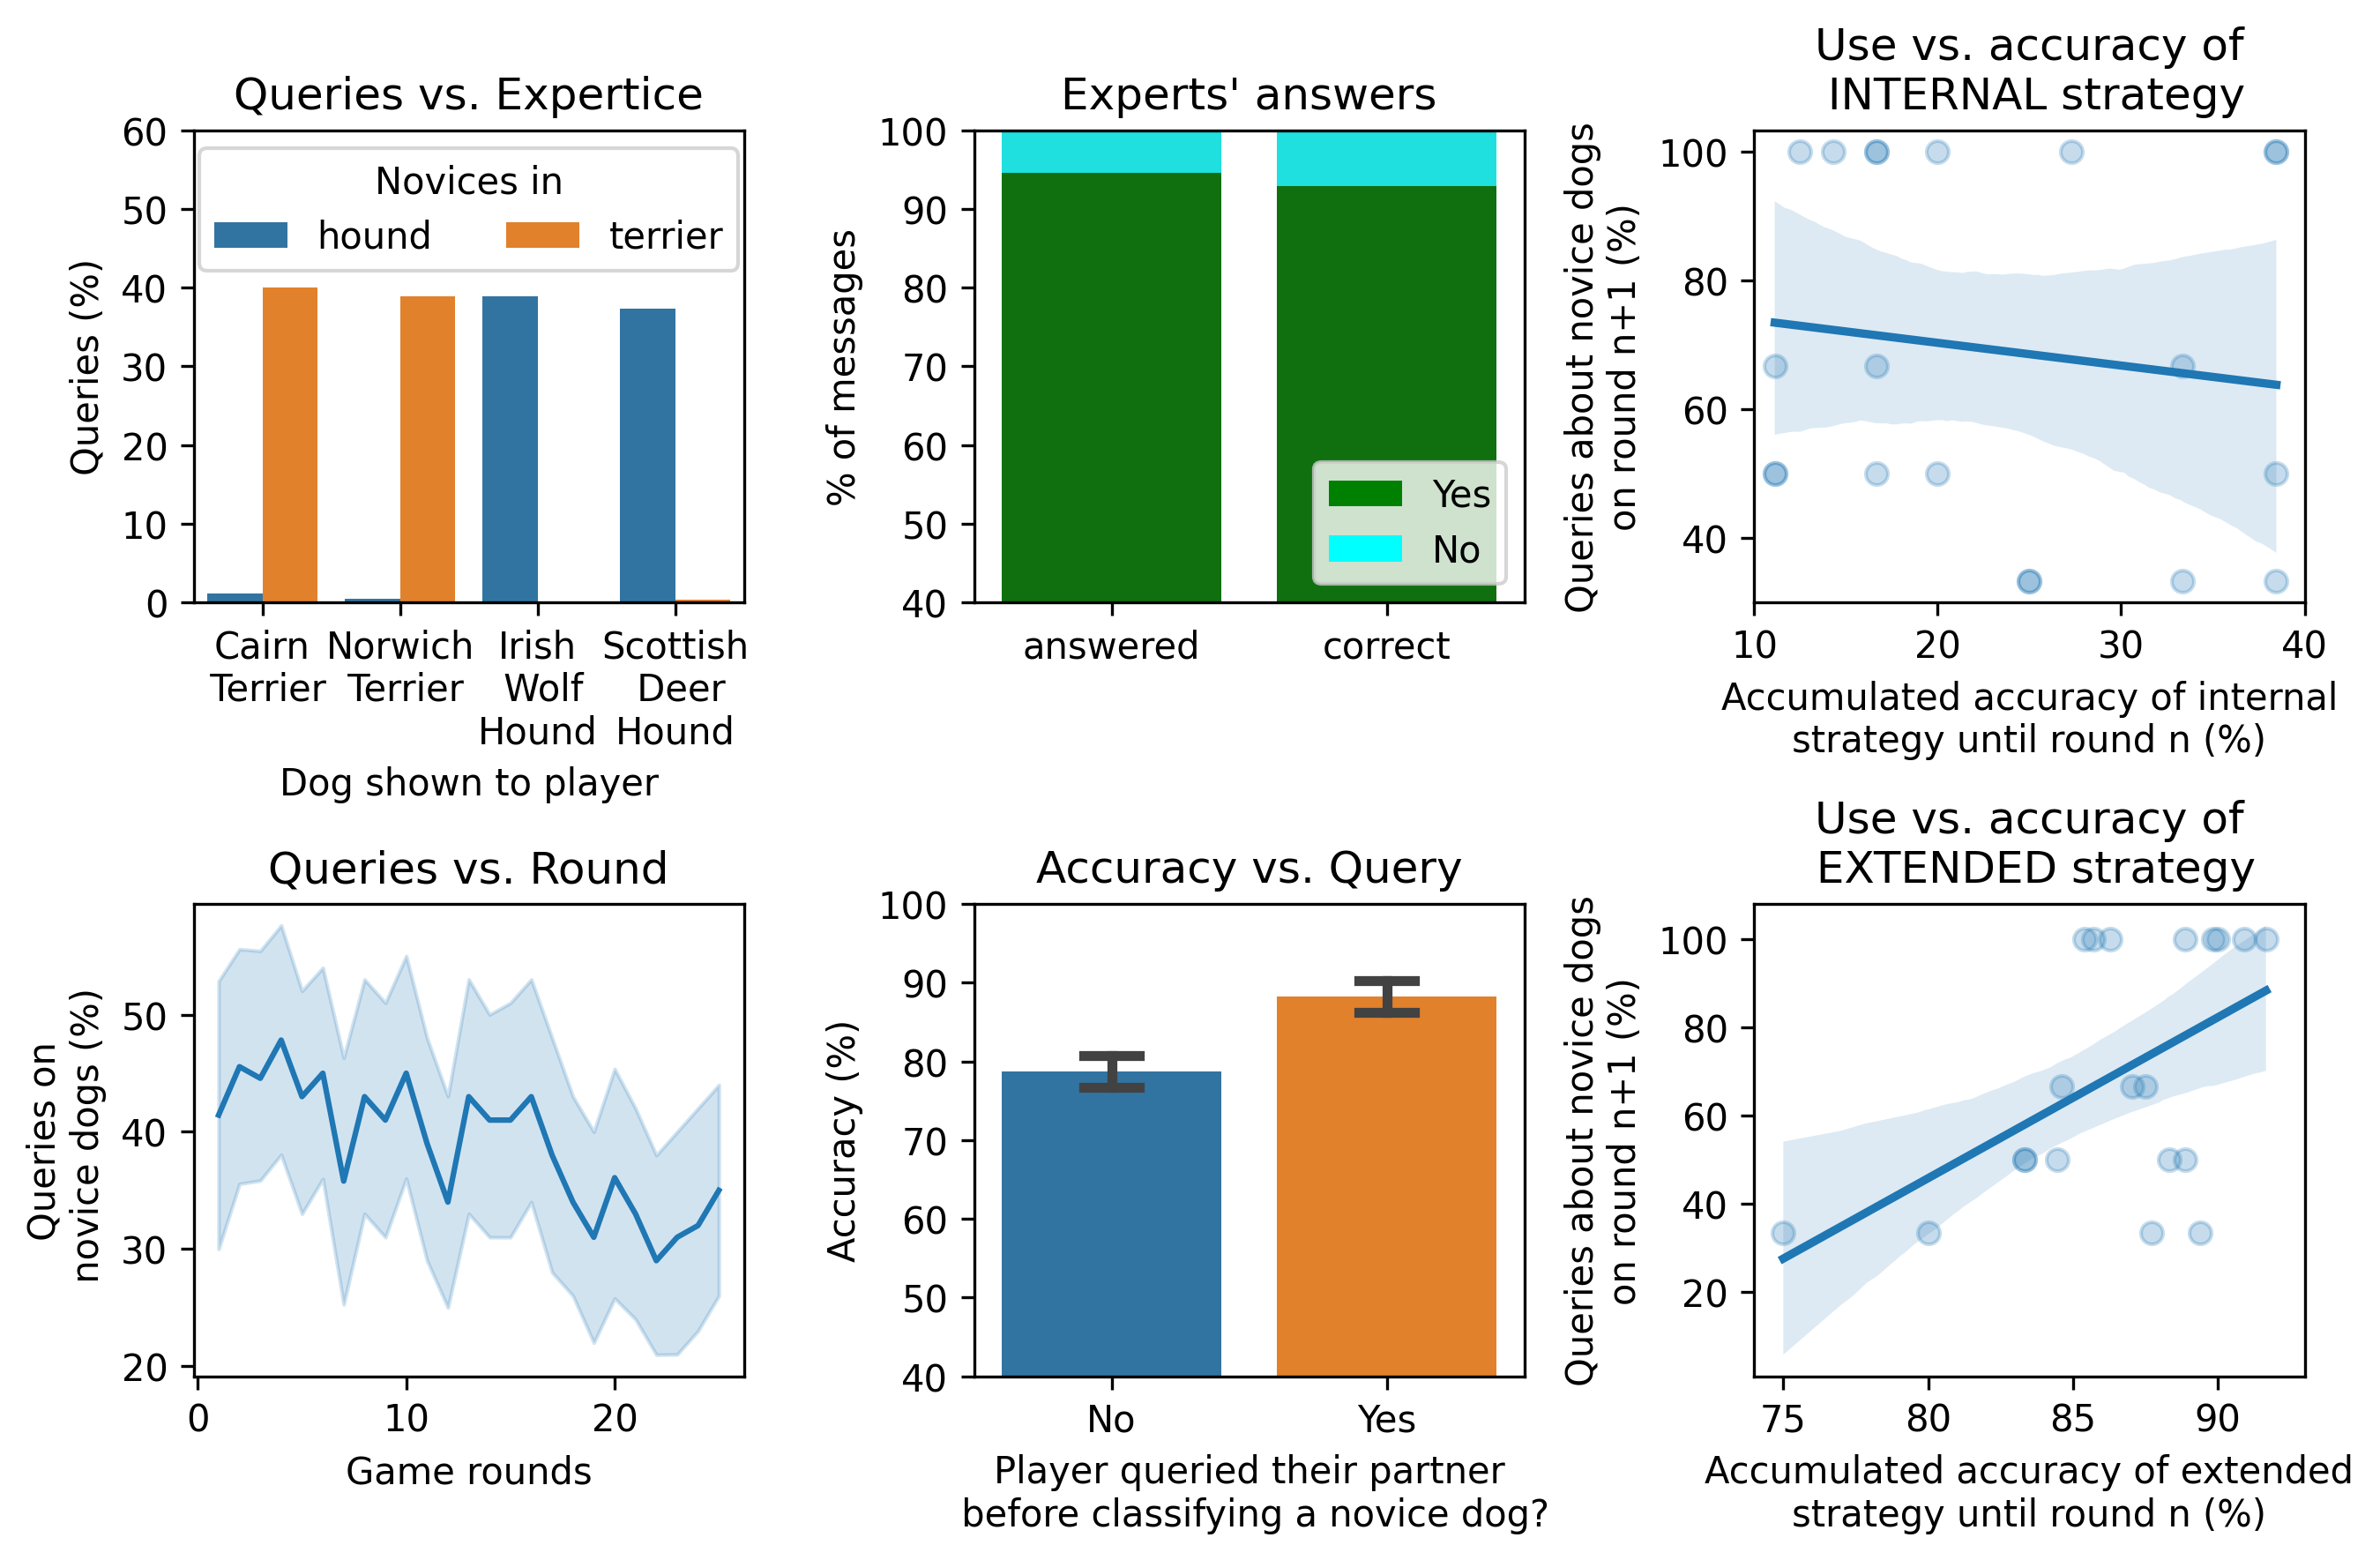

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(9, 6), dpi=300)

sns.barplot(x='kind', y='query', hue='Novice in', data=df_preguntas, ax=ax[0, 0])
ax[0, 0].set_title("Queries vs. Expertice")
ax[0, 0].set_xlabel("Dog shown to player")
ax[0, 0].set(ylim=(0, 60))
ax[0, 0].set_ylabel("Queries (%)")
ax[0, 0].legend(title="Novices in", ncol=2, loc='upper center')#bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)

respondido = df_respuestas['answered'].mean()
correcto = df_respuestas['correct'].mean()
sns.barplot(x=['answered', 'correct'], y=[100, 100], color = "cyan", ax=ax[0, 1])
sns.barplot(x=['answered', 'correct'], y=[respondido*100, correcto*100], color = "green", ax=ax[0, 1])
ax[0, 1].set_title("Experts' answers")
ax[0, 1].set_ylabel("% of messages")
topbar = plt.Rectangle((0,0),1,1,fc="cyan", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
ax[0, 1].legend([bottombar, topbar], ['Yes', 'No'], loc='lower right', ncol = 1, prop={'size':10})
ax[0, 1].set_ylim(40, 100)

sns.lineplot(x='round', y='queried', data=df_msgs, ax=ax[1, 0],
             estimator=lambda x:sum(x)/len(x)*100,ci=95)
ax[1, 0].set_xlabel("Game rounds")
#ax[1, 0].set(ylim=(0, 2))
ax[1, 0].set_ylabel("Queries on\n novice dogs (%)")
ax[1, 0].set_title("Queries vs. Round")

sns.barplot(x='strategy', y='accuracy', 
            data=df_msgs,
             estimator=lambda x:sum(x)/len(x)*100,
             ci=95, capsize=.2, ax=ax[1, 1]
            )
ax[1, 1].set_title('Accuracy vs. Query')
ax[1, 1].set_xlabel('Player queried their partner\n before classifying a novice dog?')
ax[1, 1].set_ylabel('Accuracy (%)')
ax[1, 1].set_ylim(40, 100)

sns.regplot(x='av_internal', y='new_use', data=df_internal, 
            scatter_kws={'alpha':0.25}, ax=ax[0, 2])
ax[0, 2].set_title('Use vs. accuracy of\n INTERNAL strategy')
ax[0, 2].set_ylabel('Queries about novice dogs\non round n+1 (%)')
ax[0, 2].set_xlabel('Accumulated accuracy of internal\nstrategy until round n (%)')
ax[0, 2].set_xlim(10, 40)
#ax[0, 2].set_ylim(-5, 105)

sns.regplot(x='av_extended', y='new_use', data=df_extended, 
            scatter_kws={'alpha':0.25}, ax=ax[1, 2])
ax[1, 2].set_title('Use vs. accuracy of\n EXTENDED strategy')
ax[1, 2].set_ylabel('Queries about novice dogs\non round n+1 (%)')
ax[1, 2].set_xlabel('Accumulated accuracy of extended\nstrategy until round n (%)')
ax[1, 2].set_xlim(74, 93)
#ax[1, 2].set_ylim(-5, 105)

fig.tight_layout()


In [16]:
fig.savefig('figure3.pdf', dpi=300)

---

**Figure 4:**

Reports on category understanding. Top left: Distribution of ratings in the reports, grouped according to treatment and separated on the $x$-axis by expert and novice dogs. Top center: Influence of accuracy on reports in the case of experts for paired participants (N=77). For this and all remaining plots, each data point represents one (out of two) expert dog breed of each player. Bottom left: Influence of accuracy on reports in the case of experts for solitary participants (N=88). Top right: Influence of response rate to questions asked by the novice on the report of understanding (N=65). Bottom center and right: Corresponding plots to top center and top right but including the outlier observation (N=78 center, N=66 right).

In [17]:
report_understanding = pd.read_csv('rep-understanding.csv')
reporte_comprension_expertos_parejas = filter_variables(
    report_understanding, 
    {'expertise==':'experts', 'treatment==':'paired'})
reporte_comprension_expertos_parejas.head()

,treatment,player,kind,expertise,report,accuracy,queried,answered,player_responded,was_queried
0,paired,21409433577947,A,experts,7.0,0.931034,0.022472,0.75,0.941176,0.531250
2,paired,21409433577947,C,experts,1.0,0.100000,0.011111,1.00,0.888889,0.300000
5,paired,32111755046981,B,experts,6.0,0.897436,0.000000,NaN,1.000000,0.076923
7,paired,32111755046981,D,experts,6.0,0.920000,0.010638,1.00,NaN,0.000000
8,paired,38174543864515,A,experts,4.0,0.888889,0.000000,NaN,1.000000,0.703704


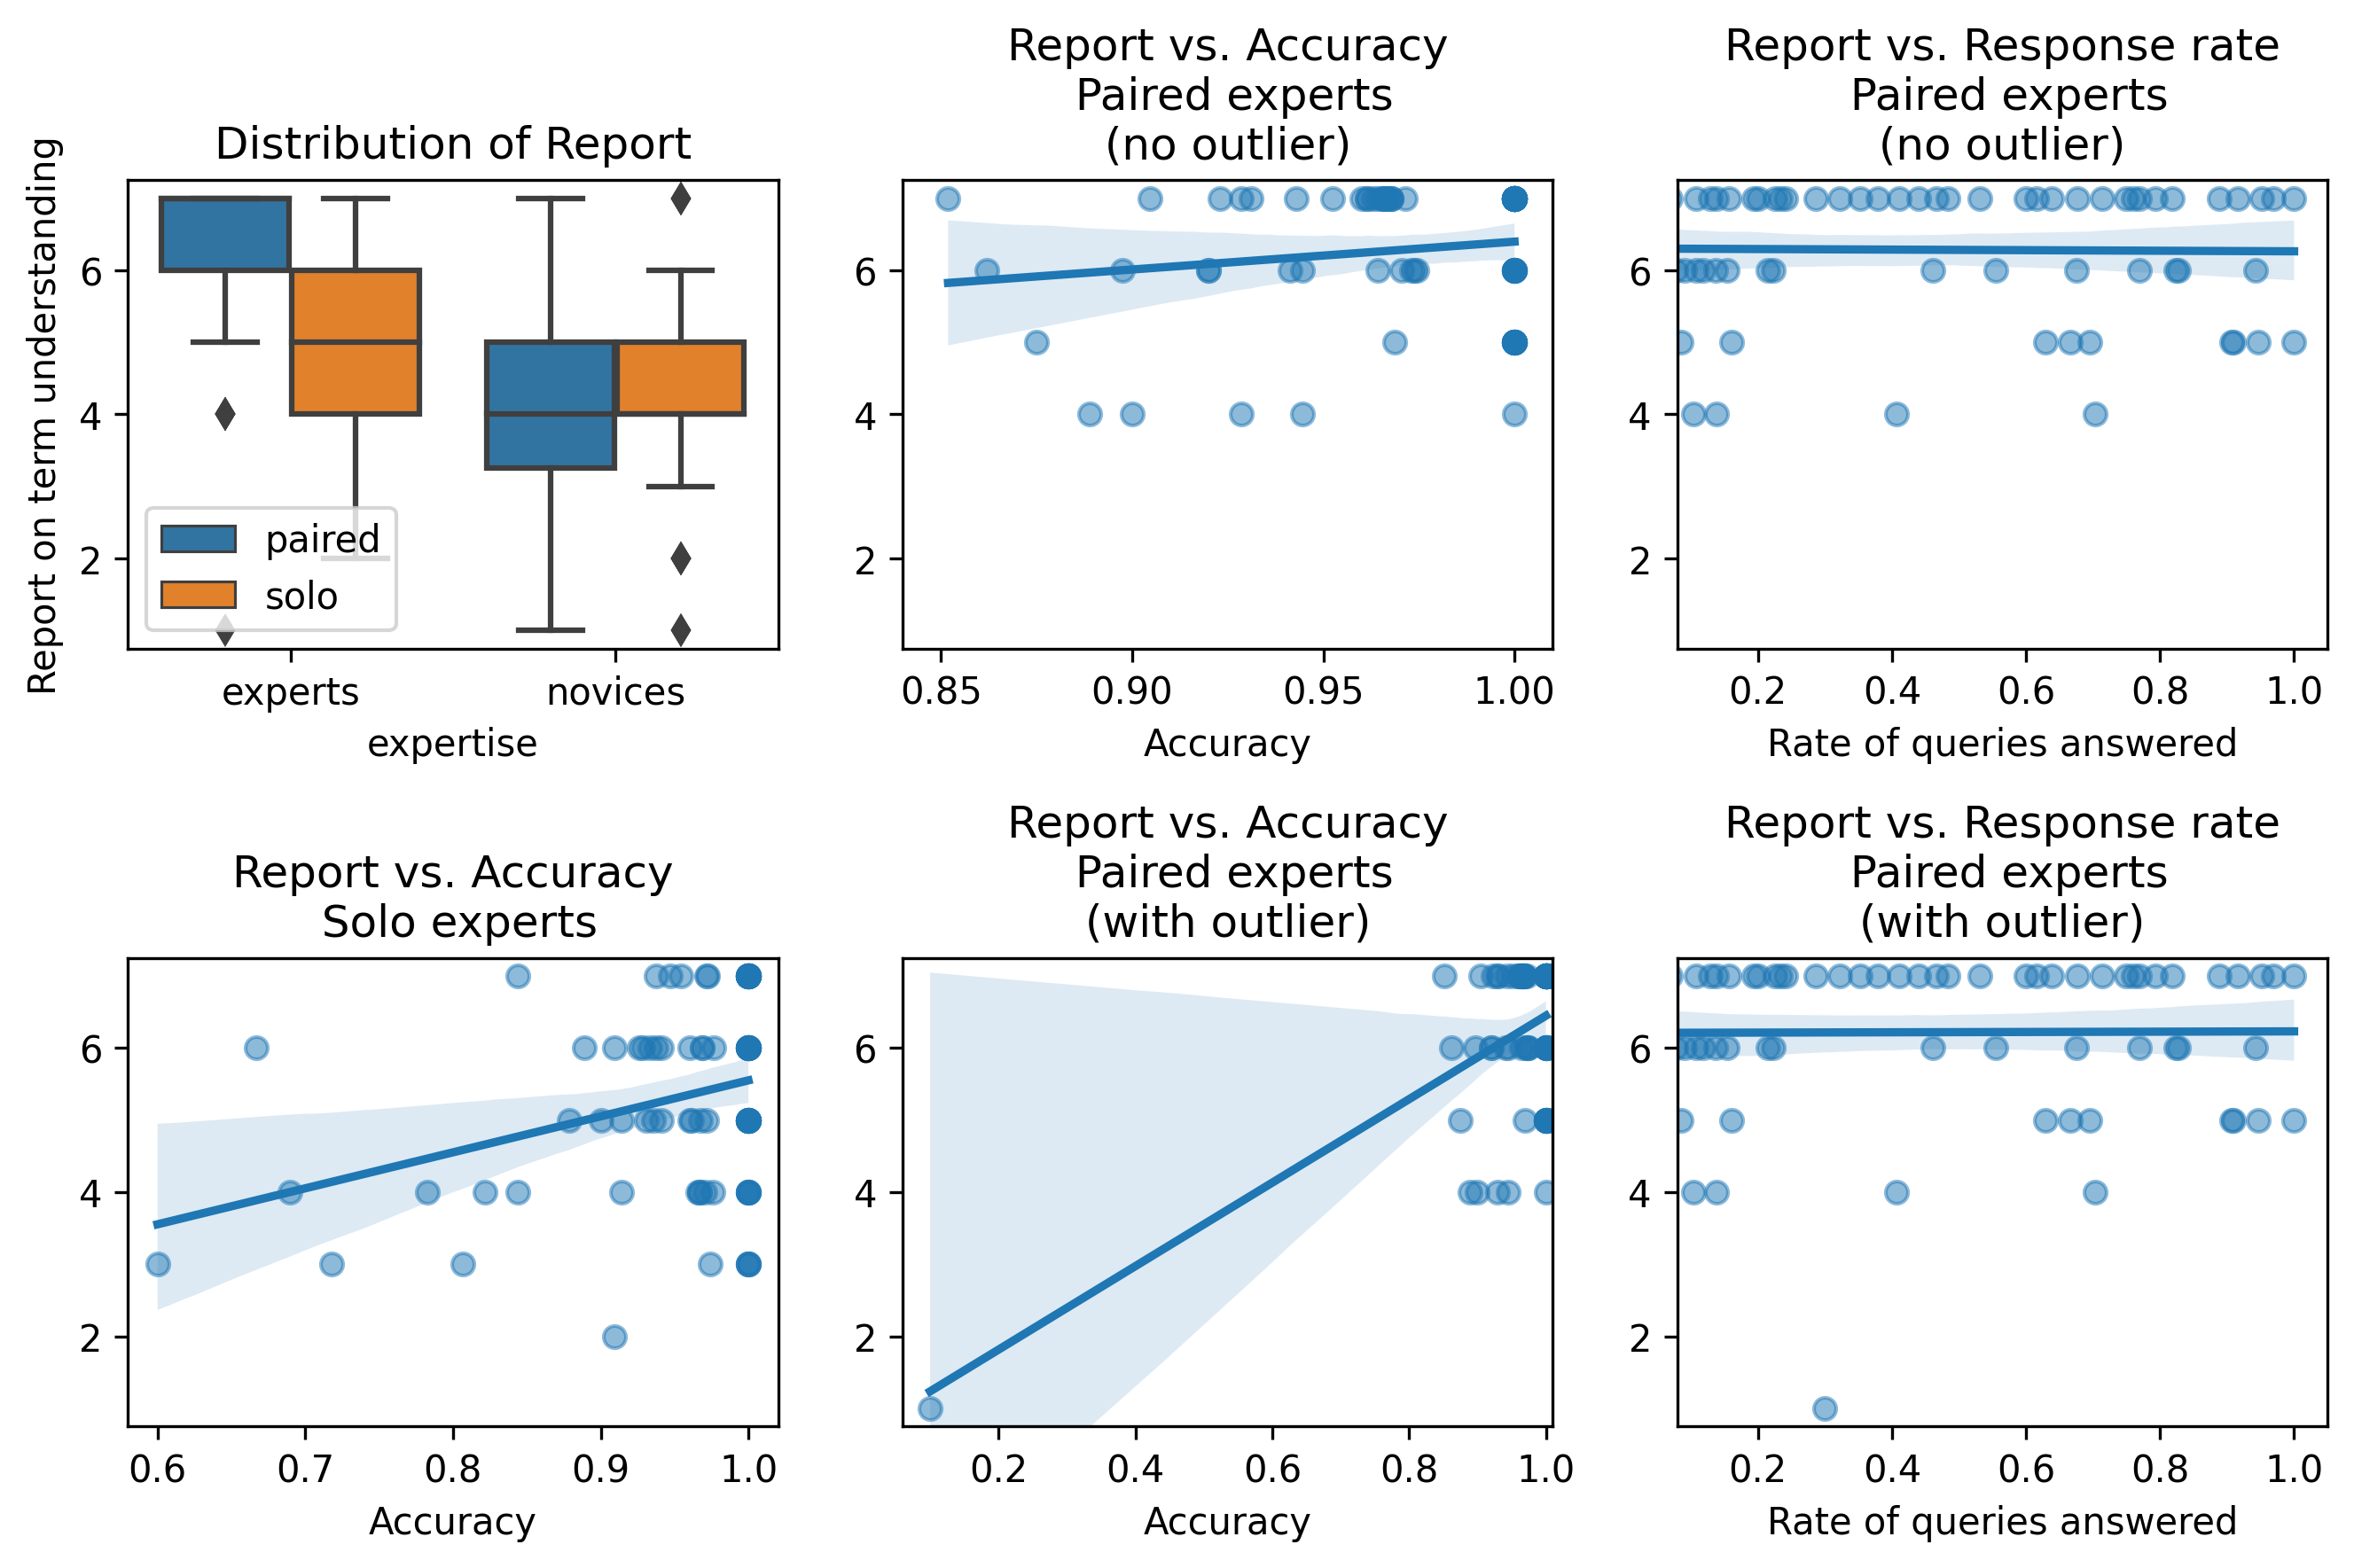

In [27]:
report_understanding = pd.read_csv('rep-understanding.csv')
reporte_comprension_expertos_parejas = filter_variables(
    report_understanding, 
    {'expertise==':'experts', 'treatment==':'paired'})
reporte_comprension_expertos_individual = filter_variables(
    report_understanding, 
    {'expertise==':'experts', 'treatment==':'solo'})

fig, axes = plt.subplots(2, 3, figsize=(9,6), dpi=300)
sns.boxplot(x='expertise', y='report', hue='treatment', data=report_understanding, ax=axes[0, 0])
sns.regplot(y='report', x='accuracy', data=reporte_comprension_expertos_individual, scatter_kws={'alpha':0.5}, ax=axes[1, 0])
sns.regplot(y='report', x='accuracy', data=reporte_comprension_expertos_parejas, scatter_kws={'alpha':0.5}, ax=axes[1, 1])
# sns.regplot(y='report', x='player_responded', data=reporte_comprension_expertos_parejas, scatter_kws={'alpha':0.5}, ax=axes[1, 2])
sns.regplot(y='report', x='was_queried', data=reporte_comprension_expertos_parejas, scatter_kws={'alpha':0.5}, ax=axes[1, 2])


# Leave out outlier
reporte_comprension_expertos_parejas = filter_variables(
    report_understanding, 
    {'expertise==':'experts', 'treatment==':'paired', 'accuracy>':.2})

sns.regplot(y='report', x='accuracy', data=reporte_comprension_expertos_parejas, scatter_kws={'alpha':0.5}, ax=axes[0, 1])
# sns.regplot(y='report', x='player_responded', data=reporte_comprension_expertos_parejas, scatter_kws={'alpha':0.5}, ax=axes[0, 2])
sns.regplot(y='report', x='was_queried', data=reporte_comprension_expertos_parejas, scatter_kws={'alpha':0.5}, ax=axes[0, 2])


axes[0, 0].set_title('Distribution of Report')
axes[0, 0].set_ylabel('Report on term understanding')
axes[0, 0].set(ylim=(0.75, 7.25))
axes[0, 0].legend(loc="lower left")
axes[1, 0].set_title('Report vs. Accuracy\n Solo experts')
axes[1, 0].set_xlabel('Accuracy')
axes[1, 0].set_ylabel('')
axes[1, 0].set(xlim=(0.58, 1.02))
axes[1, 0].set(ylim=(0.75, 7.25))
axes[0, 1].set_title('Report vs. Accuracy\n Paired experts\n(no outlier)')
axes[0, 1].set_xlabel('Accuracy')
axes[0, 1].set_ylabel('')
axes[0, 1].set(xlim=(0.84, 1.01))
axes[0, 1].set(ylim=(0.75, 7.25))
axes[0, 2].set_title('Report vs. Response rate\n Paired experts\n(no outlier)')
axes[0, 2].set_xlabel('Rate of queries answered')
axes[0, 2].set_ylabel('')
axes[0, 2].set(xlim=(0.08, 1.05))
axes[0, 2].set(ylim=(0.75, 7.25))
axes[1, 1].set_title('Report vs. Accuracy\n Paired experts\n(with outlier)')
axes[1, 1].set_xlabel('Accuracy')
axes[1, 1].set_ylabel('')
axes[1, 1].set(xlim=(0.06, 1.01))
axes[1, 1].set(ylim=(0.75, 7.25))
axes[1, 2].set_title('Report vs. Response rate\n Paired experts\n(with outlier)')
axes[1, 2].set_xlabel('Rate of queries answered')
axes[1, 2].set_ylabel('')
axes[1, 2].set(xlim=(0.08, 1.05))
axes[1, 2].set(ylim=(0.75, 7.25))

fig.tight_layout()

In [19]:
fig.savefig('figure4.pdf', dpi=300)

---

**Figure 5:**

Reports on category understanding by novices. Top left and right: report vs. classification accuracy for participants in the solitary (left, N=88) and the paired condition (right=78). Bottom left: In the paired condition, the report vs. the expert's response rate to the queries made by the novice (N=67). Bottom right: report vs. percentage of novice dogs queried by the player, distributed by 'very low' (first quartile) and 'normal' (rest of data) (N=78). Each data point is a breed of expert dog for each player.

In [20]:
reporte_comprension = pd.read_csv('rep-understanding.csv')
df_novatos_single = filter_variables(reporte_comprension, {
    'treatment==':'solo',
    'expertise==':'novices'
})
df_novatos_parejas = filter_variables(reporte_comprension, {
    'treatment==':'paired',
    'expertise==':'novices'
})

In [21]:
df_novatos_parejas.groupby('player')['queried'].mean().describe()

count    39.000000
mean      0.401201
std       0.332549
min       0.000000
25%       0.099012
50%       0.314236
75%       0.696967
max       0.976190
Name: queried, dtype: float64

In [22]:
df_novatos_parejas['use_grp'] = pd.cut(df_novatos_parejas['queried'], 
                                   bins=[0, .1, 1], 
                                   include_lowest=True,
                                   labels=['very low', 'normal'])
df_novatos_parejas.head(2)

,treatment,player,kind,expertise,report,accuracy,queried,answered,player_responded,was_queried,use_grp
1,paired,21409433577947,B,novices,7.0,0.828571,0.628571,0.954545,NaN,0.0,normal
3,paired,21409433577947,D,novices,7.0,0.571429,0.666667,1.000000,NaN,0.0,normal


In [23]:
df_novatos_parejas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1 to 159
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   treatment         78 non-null     object  
 1   player            78 non-null     int64   
 2   kind              78 non-null     object  
 3   expertise         78 non-null     object  
 4   report            78 non-null     float64 
 5   accuracy          78 non-null     float64 
 6   queried           78 non-null     float64 
 7   answered          67 non-null     float64 
 8   player_responded  7 non-null      float64 
 9   was_queried       78 non-null     float64 
 10  use_grp           78 non-null     category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 6.9+ KB


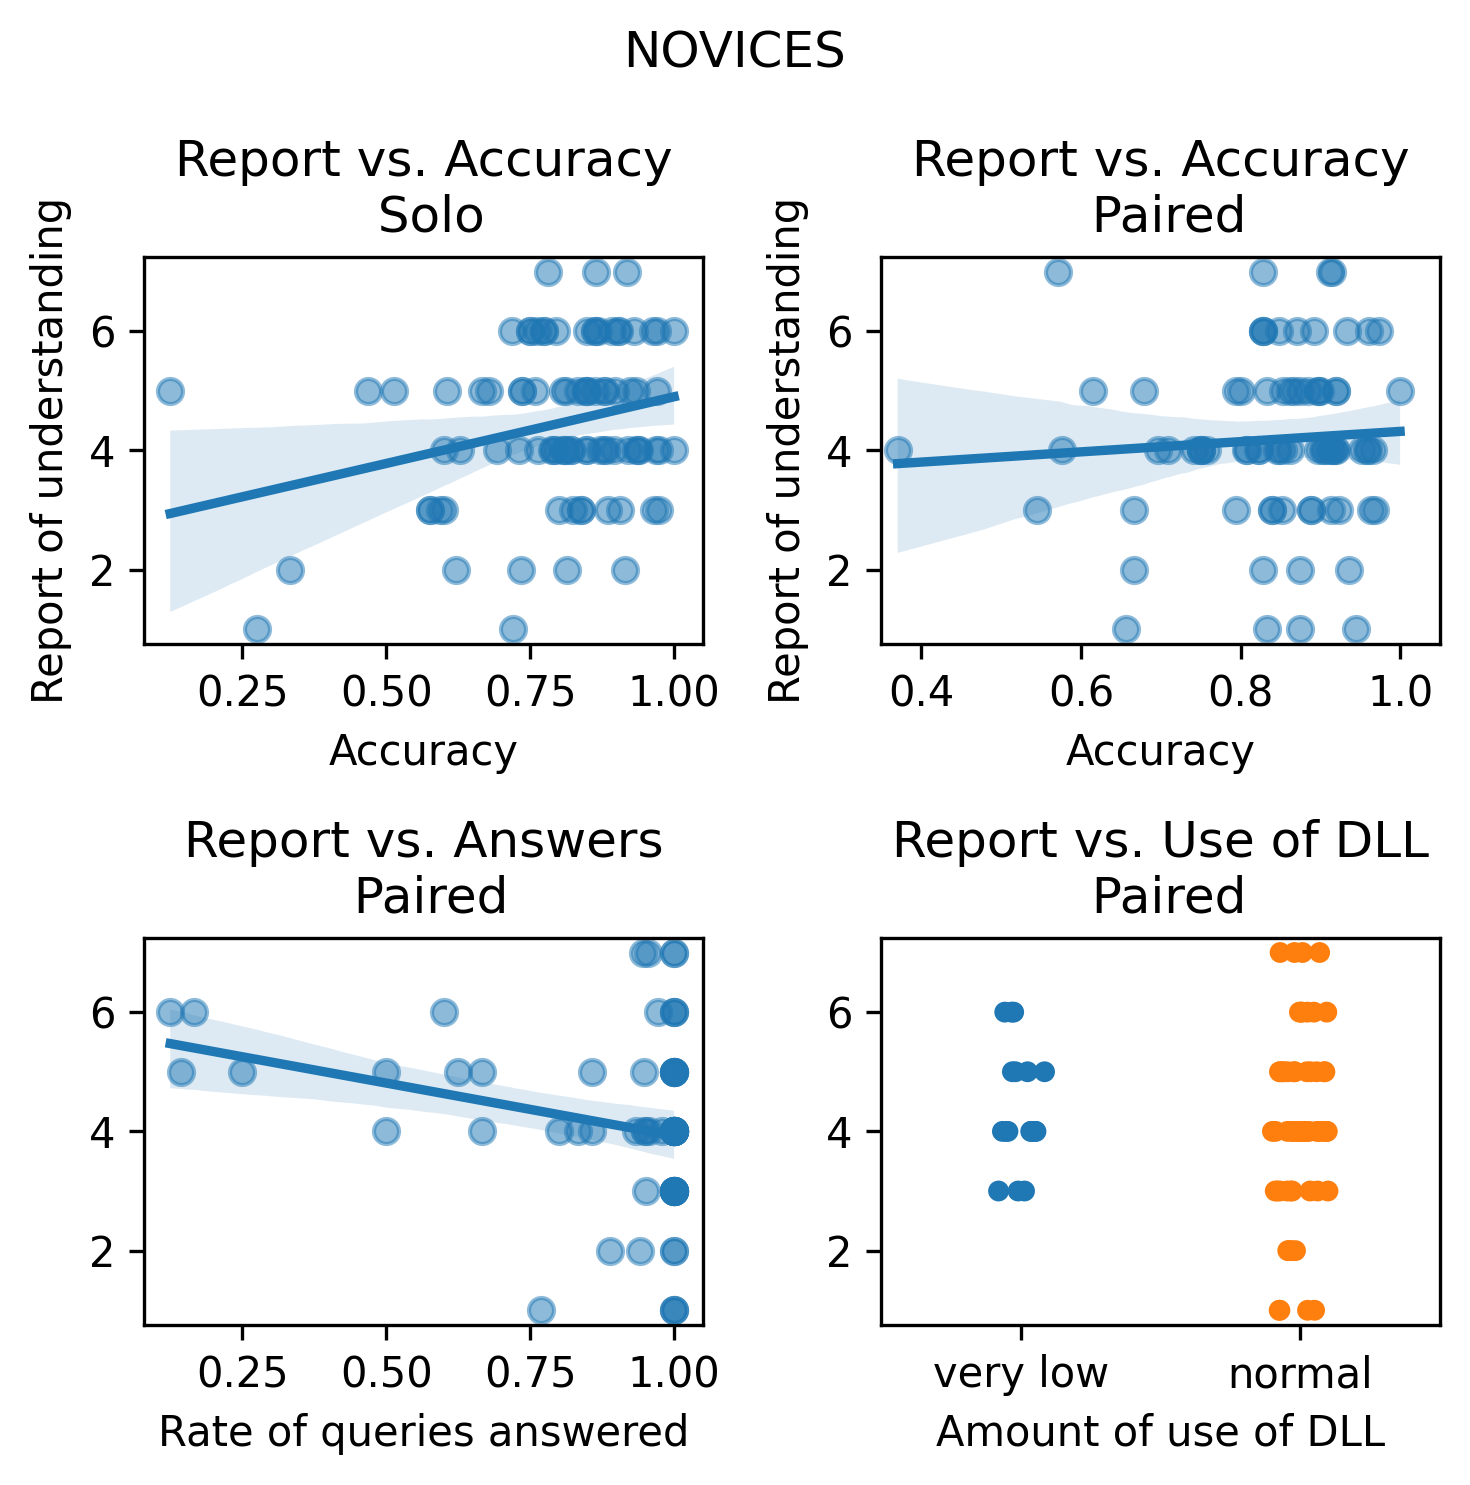

In [24]:
fig, axes = plt.subplots(2,2, figsize=(5,5), dpi=300)
sns.regplot(x='accuracy', y='report', data=df_novatos_single, 
            scatter_kws={'alpha':0.5}, ax=axes[0, 0])
sns.regplot(x='accuracy', y='report', data=df_novatos_parejas, 
            scatter_kws={'alpha':0.5}, ax=axes[0, 1])
sns.regplot(x='answered', y='report', data=df_novatos_parejas, 
            scatter_kws={'alpha':0.5}, ax=axes[1, 0])
sns.stripplot(x='use_grp', y='report', 
               data=df_novatos_parejas, ax=axes[1, 1])

fig.suptitle('NOVICES')

axes[0, 0].set_title('Report vs. Accuracy\n Solo')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_ylabel('Report of understanding')
axes[0, 0].set(xlim=(0.08, 1.05))
axes[0, 0].set(ylim=(0.75, 7.25))

axes[0, 1].set_title('Report vs. Accuracy\n Paired')
axes[0, 1].set_xlabel('Accuracy')
axes[0, 1].set_ylabel('Report of understanding')
axes[0, 1].set(xlim=(0.35, 1.05))
axes[0, 1].set(ylim=(0.75, 7.25))

axes[1, 0].set_title('Report vs. Answers\n Paired')
axes[1, 0].set_xlabel('Rate of queries answered')
axes[1, 0].set_ylabel('')
axes[1, 0].set(xlim=(0.08, 1.05))
axes[1, 0].set(ylim=(0.75, 7.25))

axes[1, 1].set_title('Report vs. Use of DLL\n Paired')
axes[1, 1].set(ylim=(0.75, 7.25))
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('Amount of use of DLL')

fig.tight_layout()

In [25]:
fig.savefig('figure5.pdf', dpi=300)